# 11. Time Series

* fixed frequency: data points occur at regular intervals

ways to mark and refer to time series
* timestamps
* Fixed periods, e.g., Jan 2007, or 2010
* Intervals
    * start and end timestamp (? no interval)
    * periods are special cases of intervals (?)
* Experiment or elapsed time
    * start time, relative time
    
Notes
* timedelta indexes of pandas is not covered in the book

## 11.1 Date and Time Data Types and Tools

In [1]:
from datetime import datetime

now = datetime.now()

now

datetime.datetime(2021, 5, 8, 20, 57, 49, 837129)

In [2]:
now.year, now.month, now.day

(2021, 5, 8)

In [3]:
from datetime import timedelta

start = datetime(2011, 1, 7)
start + timedelta(12) # day

datetime.datetime(2011, 1, 19, 0, 0)

In [4]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

In [5]:
stamp = datetime(2021, 3, 27)
str(stamp)

'2021-03-27 00:00:00'

In [6]:
# string-format-time
stamp.strftime('%Y-%m-%d')

'2021-03-27'

#### Datetime format specification (ISO C89 compatible)

|Type|Description|
|----|:----------------|
|%Y|Four-digit year|
|%y|Two-digit year|
|%m|Two-digit month [01, 12]|
|%d|Two-digit day [01, 31]|
|%H|Hour (24-hour clock) [00, 23]|
|%I|Hour (12-hour clock) [01, 12]|
|%M|Two-digit minute [00, 59]|
|%S|Second [00, 61] (seconds 60, 61 account for leap seconds)|
|%w|Weekday as integer [0 (Sunday), 6]|
|%U|Week number of the year [00, 53]; Sunday is considered the first day of the week, and days before the first Sunday of the year are “week 0”|
|%W|Week number of the year [00, 53]; Monday is considered the first day of the week, and days before the first Monday of the year are “week 0”|
|%z|UTC time zone offset as +HHMM or -HHMM; empty if time zone naive|
|%F|Shortcut for %Y-%m-%d (e.g., 2012-4-18)|
|%D|Shortcut for %m/%d/%y (e.g., 04/18/12)|

#### Locale-specific date formatting

|Type|Description|
|:---|:---|
|%a|Abbreviated weekday name|
|%A|Full weekday name|
|%b|Abbreviated month name|
|%B|Full month name|
|%c|Full date and time (e.g., ‘Tue 01 May 2012 04:20:57 PM’)|
|%p|Locale equivalent of AM or PM|
|%x|Locale-appropriate formatted date (e.g., in the United States, May 1, 2012 yields ’05/01/2012’)|
|%X|Locale-appropriate time (e.g., ’04:24:12 PM’)|

In [7]:
value = '2011-01-03'
# string-parse-time
datetime.strptime(value, '%Y-%M-%d')

datetime.datetime(2011, 1, 3, 0, 1)

In [8]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [9]:
# 3rd party dateutil package that is installed with pandas
from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [10]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [11]:
parse('6/12/2022', dayfirst=True)

datetime.datetime(2022, 12, 6, 0, 0)

In [12]:
import pandas as pd

datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [13]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [14]:
idx[2] # Not a Time

NaT

In [15]:
pd.isnull(idx)

array([False, False,  True])

## 11.2 Time Series Basics

In [16]:
import numpy as np
from datetime import datetime

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(range(6), index=dates)

ts

2011-01-02    0
2011-01-05    1
2011-01-07    2
2011-01-08    3
2011-01-10    4
2011-01-12    5
dtype: int64

In [17]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [18]:
ts + ts[::2]

2011-01-02    0.0
2011-01-05    NaN
2011-01-07    4.0
2011-01-08    NaN
2011-01-10    8.0
2011-01-12    NaN
dtype: float64

In [19]:
ts.index.dtype

dtype('<M8[ns]')

In [20]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [21]:
ts[stamp]

0

In [22]:
# US date notation
ts['1/10/2011']

4

In [23]:
ts

2011-01-02    0
2011-01-05    1
2011-01-07    2
2011-01-08    3
2011-01-10    4
2011-01-12    5
dtype: int64

In [24]:
# filtering by day
ts[ts.index.strftime('%d') == '09']

Series([], dtype: int64)

In [25]:
try:
    ts['10/1/2011']
except:
    print("The Europe notation doesn't work.")

The Europe notation doesn't work.


In [26]:
# This works though
ts['2011/1/10']

4

In [27]:
ts['20110110']

4

In [28]:
longer_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2021', periods=1000))
longer_ts

2021-01-01    0.359948
2021-01-02    0.488883
2021-01-03   -1.313765
2021-01-04    0.512694
2021-01-05   -0.083942
                ...   
2023-09-23   -1.498180
2023-09-24   -0.002889
2023-09-25   -0.584155
2023-09-26    0.492201
2023-09-27    0.993965
Freq: D, Length: 1000, dtype: float64

In [29]:
longer_ts['2021-02']

2021-02-01    0.764331
2021-02-02    0.226885
2021-02-03   -0.711177
2021-02-04   -0.569617
2021-02-05   -0.273730
2021-02-06    0.104884
2021-02-07    1.115764
2021-02-08    1.398847
2021-02-09   -0.457306
2021-02-10    0.128732
2021-02-11    0.054582
2021-02-12    2.060465
2021-02-13   -0.288999
2021-02-14    0.067295
2021-02-15    0.756626
2021-02-16    0.572327
2021-02-17    0.525331
2021-02-18   -2.091699
2021-02-19   -0.980734
2021-02-20    0.718321
2021-02-21   -0.079644
2021-02-22    0.628477
2021-02-23    0.238333
2021-02-24   -0.352660
2021-02-25   -0.271437
2021-02-26   -1.791374
2021-02-27   -1.217178
2021-02-28    0.139588
Freq: D, dtype: float64

In [30]:
# slicing
ts[datetime(2011, 1, 7):]

2011-01-07    2
2011-01-08    3
2011-01-10    4
2011-01-12    5
dtype: int64

In [31]:
ts['20110106':'20110112']

2011-01-07    2
2011-01-08    3
2011-01-10    4
2011-01-12    5
dtype: int64

In [32]:
ts.truncate(after='20110109')

2011-01-02    0
2011-01-05    1
2011-01-07    2
2011-01-08    3
dtype: int64

### Time Series with Dulicate Indices

In [33]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [34]:
dup_ts.index.is_unique

False

In [35]:
dup_ts['20000101']

0

In [36]:
dup_ts['20000102']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [37]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [38]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 Date Ranges, Frequencies, and Shifting

In [39]:
ts

2011-01-02    0
2011-01-05    1
2011-01-07    2
2011-01-08    3
2011-01-10    4
2011-01-12    5
dtype: int64

In [40]:
resampler = ts.resample('D')
resampler

### Generating Date Ranges

In [41]:
index = pd.date_range('2012-04-01', '2012-05-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01'],
              dtype='datetime64[ns]', freq='D')

In [42]:
pd.date_range(start='2021-04-01', periods=20)

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12',
               '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
               '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20'],
              dtype='datetime64[ns]', freq='D')

In [43]:
pd.date_range(end='2021-04-01', periods=20)

DatetimeIndex(['2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
               '2021-03-29', '2021-03-30', '2021-03-31', '2021-04-01'],
              dtype='datetime64[ns]', freq='D')

In [44]:
# BM: BusinessMonthEnd / Last business day (weekday) of month
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [45]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [46]:
# nomalize to midnight
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

|Alias|Offset type|Description|
|:----|:---------:|:----------|
|D|Day|Calendar daily|
|B|BusinessDay|Business daily|
|H|Hour|Hourly|
|T or min|Minute|Minutely|
|S|Second|Secondly|
|L or ms|Milli|Millisecond (1/1,000 of 1 second)|
|U|Micro|Microsecond (1/1,000,000 of 1 second)|
|M|MonthEnd|Last calendar day of month|
|BM|BusinessMonthEnd|Last business day (weekday) of month|
|MS|MonthBegin|First calendar day of month|
|BMS|BusinessMonthBegin|First weekday of month|
|W-MON, W-TUE, ...|Week|Weekly on given day of week (MON, TUE, WED, THU, FRI, SAT, or SUN)|
|WOM-1MON, WOM-2MON, ...|WeekOfMonth|Generate weekly dates in the first, second, third, or fourth week of the month (e.g., WOM-3FRI for the third Friday of each month)|
|Q-JAN, Q-FEB, ...|QuarterEnd|Quarterly dates anchored on last calendar day of each month, for year ending in indicated month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC)|
|BQ-JAN, BQ-FEB, ...|BusinessQuarterEnd|Quarterly dates anchored on last weekday day of each month, for year ending in indicated month|
|QS-JAN, QS-FEB, ...|QuarterBegin|Quarterly dates anchored on first calendar day of each month, for year ending in indicated month|
|BQS-JAN, BQS-FEB, ...|BusinessQuarterBegin|Quarterly dates anchored on first weekday day of each month, for year ending in indicated month|
|A-JAN, A-FEB, ...|YearEnd|Annual dates anchored on last calendar day of given month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC)|
|BA-JAN, BA-FEB, ...|BusinessYearEnd|Annual dates anchored on last weekday of given month|
|AS-JAN, AS-FEB, ...|YearBegin|Annual dates anchored on first day of given month|
|BAS-JAN, BAS-FEB, ...|BusinessYearBegin|Annual dates anchored on first weekday of given month|

### Frequencies and Date Offsets

Frequencies = base frequency + multiplier

In [47]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()
hour

<Hour>

In [48]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [49]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [50]:
Hour(2) + Minute(30)

<150 * Minutes>

In [51]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

Anchored offsets: not evenly spaced frequencies like 'M' and 'BM'.

In [52]:
# Week of Month Dates
# This shows third Friday of each month.
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

In [53]:
ts = pd.Series(np.arange(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

ts

2000-01-31    0
2000-02-29    1
2000-03-31    2
2000-04-30    3
Freq: M, dtype: int64

In [54]:
ts.shift(2)

2000-01-31    NaN
2000-02-29    NaN
2000-03-31    0.0
2000-04-30    1.0
Freq: M, dtype: float64

In [55]:
ts.shift(-2)

2000-01-31    2.0
2000-02-29    3.0
2000-03-31    NaN
2000-04-30    NaN
Freq: M, dtype: float64

In [56]:
ts / ts.shift(1) - 1

2000-01-31    NaN
2000-02-29    inf
2000-03-31    1.0
2000-04-30    0.5
Freq: M, dtype: float64

In [57]:
# advancing the timestamp
ts.shift(2, freq='M')

2000-03-31    0
2000-04-30    1
2000-05-31    2
2000-06-30    3
Freq: M, dtype: int64

In [58]:
# T: minutes
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0
2000-02-29 01:30:00    1
2000-03-31 01:30:00    2
2000-04-30 01:30:00    3
dtype: int64

#### Shifting dates with offsets

In [59]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [60]:
# rolling forward to the next anchored date
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [61]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [62]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [63]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [64]:
ts = pd.Series(np.arange(10),
               index=pd.date_range('1/15/2000', periods=10, freq='4d'))

ts

2000-01-15    0
2000-01-19    1
2000-01-23    2
2000-01-27    3
2000-01-31    4
2000-02-04    5
2000-02-08    6
2000-02-12    7
2000-02-16    8
2000-02-20    9
Freq: 4D, dtype: int64

In [65]:
ts.groupby(offset.rollforward).mean()

2000-01-31    2
2000-02-29    7
dtype: int64

In [66]:
# in fact, this is easier and faster
ts.resample('M').mean()

2000-01-31    2
2000-02-29    7
Freq: M, dtype: int64

## 11.4 Time Zone Handling

In [67]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [68]:
pytz.common_timezones[:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [69]:
len(pytz.common_timezones)

439

In [70]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [71]:
pytz.timezone('Europe/Berlin')

<DstTzInfo 'Europe/Berlin' LMT+0:53:00 STD>

In [72]:
{tz.split('/')[0] for tz in pytz.common_timezones}

{'Africa',
 'America',
 'Antarctica',
 'Arctic',
 'Asia',
 'Atlantic',
 'Australia',
 'Canada',
 'Europe',
 'GMT',
 'Indian',
 'Pacific',
 'US',
 'UTC'}

In [73]:
[tz for tz in pytz.common_timezones if 'US' in tz]

['US/Alaska',
 'US/Arizona',
 'US/Central',
 'US/Eastern',
 'US/Hawaii',
 'US/Mountain',
 'US/Pacific']

### Time Zone Localization and Conversion

In [74]:
# By default, time series in pandas are time zone naive. 
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2012-03-09 09:30:00    0
2012-03-10 09:30:00    1
2012-03-11 09:30:00    2
2012-03-12 09:30:00    3
2012-03-13 09:30:00    4
2012-03-14 09:30:00    5
Freq: D, dtype: int64

In [75]:
print(ts.index.tz)

None


In [76]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [77]:
# naive to localized
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    0
2012-03-10 09:30:00+00:00    1
2012-03-11 09:30:00+00:00    2
2012-03-12 09:30:00+00:00    3
2012-03-13 09:30:00+00:00    4
2012-03-14 09:30:00+00:00    5
Freq: D, dtype: int64

In [78]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [79]:
ts_utc.tz_convert('Europe/Berlin')

2012-03-09 10:30:00+01:00    0
2012-03-10 10:30:00+01:00    1
2012-03-11 10:30:00+01:00    2
2012-03-12 10:30:00+01:00    3
2012-03-13 10:30:00+01:00    4
2012-03-14 10:30:00+01:00    5
Freq: D, dtype: int64

**Caution**

Localizing naive timestamps also checks for ambiguous or non-existent times around daylight saving time transitions.

???

### Operations with Time Zone−Aware Timestamp Objects

In [80]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [81]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [82]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [83]:
stamp_utc.value

1299902400000000000

In [84]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [85]:
from pandas.tseries.offsets import Hour

stamp = pd.Timestamp('2012-03-11 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [86]:
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [87]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [88]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [89]:
# B: Business day
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts 

2012-03-07 09:30:00    0
2012-03-08 09:30:00    1
2012-03-09 09:30:00    2
2012-03-12 09:30:00    3
2012-03-13 09:30:00    4
2012-03-14 09:30:00    5
2012-03-15 09:30:00    6
2012-03-16 09:30:00    7
2012-03-19 09:30:00    8
2012-03-20 09:30:00    9
Freq: B, dtype: int64

In [90]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## 11.5 Periods and Period Arithmetic

In [91]:
p = pd.Period(2007, freq='A-Dec')
p

Period('2007', 'A-DEC')

In [92]:
p + 5

Period('2012', 'A-DEC')

In [93]:
p - 2

Period('2005', 'A-DEC')

In [94]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [95]:
try:
    pd.Period('2014', freq='A-NOV') - p
except Exception as e:
    print(repr(e))

IncompatibleFrequency('Input has different freq=A-DEC from Period(freq=A-NOV)')


In [96]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [97]:
pd.Series(np.arange(6), index=rng)

2000-01    0
2000-02    1
2000-03    2
2000-04    3
2000-05    4
2000-06    5
Freq: M, dtype: int64

In [98]:
values = ['2001Q3', '2002Q2', '2003Q1']
pd.PeriodIndex(values, freq='Q-DEC')

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [99]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [100]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [101]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [102]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [103]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [104]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [105]:
p = pd.Period('Aug-2007', 'M')
p

Period('2007-08', 'M')

In [106]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [107]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2006    0
2007    1
2008    2
2009    3
Freq: A-DEC, dtype: int64

In [108]:
ts.asfreq('M', how='start')

2006-01    0
2007-01    1
2008-01    2
2009-01    3
Freq: M, dtype: int64

In [109]:
ts.asfreq('B', how='end')

2006-12-29    0
2007-12-31    1
2008-12-31    2
2009-12-31    3
Freq: B, dtype: int64

### Quarterly Period Frequencies

In [110]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [111]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [112]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [113]:
# at 4 PM on the second-to-last business day of the quarter
# B: business day
# e: end (?)
# T: minutes
# s: start
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [114]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [115]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [116]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back)

In [117]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -1.158962
2000-02-29   -0.381486
2000-03-31   -0.148320
Freq: M, dtype: float64

In [118]:
pts = ts.to_period()
pts

2000-01   -1.158962
2000-02   -0.381486
2000-03   -0.148320
Freq: M, dtype: float64

In [119]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -0.566556
2000-01-30    0.161652
2000-01-31   -1.441881
2000-02-01   -1.909611
2000-02-02    0.336371
2000-02-03   -0.041466
Freq: D, dtype: float64

In [120]:
# duplicate periods
ts2.to_period('M')

2000-01   -0.566556
2000-01    0.161652
2000-01   -1.441881
2000-02   -1.909611
2000-02    0.336371
2000-02   -0.041466
Freq: M, dtype: float64

In [121]:
# to convert back
pts = ts2.to_period()
pts

2000-01-29   -0.566556
2000-01-30    0.161652
2000-01-31   -1.441881
2000-02-01   -1.909611
2000-02-02    0.336371
2000-02-03   -0.041466
Freq: D, dtype: float64

In [122]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.566556
2000-01-30 23:59:59.999999999    0.161652
2000-01-31 23:59:59.999999999   -1.441881
2000-02-01 23:59:59.999999999   -1.909611
2000-02-02 23:59:59.999999999    0.336371
2000-02-03 23:59:59.999999999   -0.041466
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [123]:
data = pd.read_csv('pydata-book/examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [124]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [125]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [126]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [127]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 Resampling and Frequency Conversion

Resampling: changing frequence of a time series

In [128]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2000-01-01     0
2000-01-02     1
2000-01-03     2
2000-01-04     3
2000-01-05     4
              ..
2000-04-05    95
2000-04-06    96
2000-04-07    97
2000-04-08    98
2000-04-09    99
Freq: D, Length: 100, dtype: int64

In [129]:
ts.resample('M').mean()

2000-01-31    15
2000-02-29    45
2000-03-31    75
2000-04-30    95
Freq: M, dtype: int64

In [130]:
ts.resample('M', kind='period').mean()

2000-01    15
2000-02    45
2000-03    75
2000-04    95
Freq: M, dtype: int64

### Downsampling

In [136]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(1, len(rng)+1), index=rng)
ts

2000-01-01 00:00:00     1
2000-01-01 00:01:00     2
2000-01-01 00:02:00     3
2000-01-01 00:03:00     4
2000-01-01 00:04:00     5
2000-01-01 00:05:00     6
2000-01-01 00:06:00     7
2000-01-01 00:07:00     8
2000-01-01 00:08:00     9
2000-01-01 00:09:00    10
2000-01-01 00:10:00    11
2000-01-01 00:11:00    12
Freq: T, dtype: int64

In [137]:
# the left bin edge is inclusive by default
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     1
2000-01-01 00:00:00    20
2000-01-01 00:05:00    45
2000-01-01 00:10:00    12
Freq: 5T, dtype: int64

In [138]:
# it's weird that the first row is handled differently
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     1
2000-01-01 00:05:00    20
2000-01-01 00:10:00    45
2000-01-01 00:15:00    12
Freq: 5T, dtype: int64

In [140]:
# This looks right.
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    23
Freq: 5T, dtype: int64

In [142]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

<ipython-input-142-793d385fe06a>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right', label='right', loffset='-1s').sum()


1999-12-31 23:59:59     1
2000-01-01 00:04:59    20
2000-01-01 00:09:59    45
2000-01-01 00:14:59    12
Freq: 5T, dtype: int64

In [144]:
from pandas.tseries.frequencies import to_offset

ts = ts.resample('5min', closed='right', 
            label='right').sum()
ts.index = ts.index + to_offset('-1s')
ts

1999-12-31 23:59:59     1
2000-01-01 00:04:59    20
2000-01-01 00:09:59    45
2000-01-01 00:14:59    12
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) Resampling

In [145]:
ts.resample('5min').ohlc()

,open,high,low,close
1999-12-31 23:55:00,1,1,1,1
2000-01-01 00:00:00,20,20,20,20
2000-01-01 00:05:00,45,45,45,45
2000-01-01 00:10:00,12,12,12,12


### Upsampling and Interpolation

In [148]:
frame = pd.DataFrame(np.arange(8).reshape(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

frame

,Colorado,Texas,New York,Ohio
2000-01-05,0,1,2,3
2000-01-12,4,5,6,7


In [149]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.0,1.0,2.0,3.0
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,4.0,5.0,6.0,7.0


In [150]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0,1,2,3
2000-01-06,0,1,2,3
2000-01-07,0,1,2,3
2000-01-08,0,1,2,3
2000-01-09,0,1,2,3
2000-01-10,0,1,2,3
2000-01-11,0,1,2,3
2000-01-12,4,5,6,7


In [151]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.0,1.0,2.0,3.0
2000-01-06,0.0,1.0,2.0,3.0
2000-01-07,0.0,1.0,2.0,3.0
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,4.0,5.0,6.0,7.0


In [152]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0,1,2,3
2000-01-13,4,5,6,7


### Resampling with Periods

In [153]:
frame = pd.DataFrame(np.arange(24*4).reshape(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0,1,2,3
2000-02,4,5,6,7
2000-03,8,9,10,11
2000-04,12,13,14,15
2000-05,16,17,18,19


In [154]:
annual_frame = frame.resample('A-DEC').mean()

annual_frame

,Colorado,Texas,New York,Ohio
2000,22,23,24,25
2001,70,71,72,73


In [155]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,22,23,24,25
2000Q2,22,23,24,25
2000Q3,22,23,24,25
2000Q4,22,23,24,25
2001Q1,70,71,72,73
2001Q2,70,71,72,73
2001Q3,70,71,72,73
2001Q4,70,71,72,73


In [156]:
# end of Q-DEC?
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,22,23,24,25
2001Q1,22,23,24,25
2001Q2,22,23,24,25
2001Q3,22,23,24,25
2001Q4,70,71,72,73


In [157]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,22,23,24,25
2001Q1,22,23,24,25
2001Q2,22,23,24,25
2001Q3,22,23,24,25
2001Q4,70,71,72,73
2002Q1,70,71,72,73
2002Q2,70,71,72,73
2002Q3,70,71,72,73


## 11.7 Moving Window Functions

In [158]:
close_px_all = pd.read_csv('pydata-book/examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)

close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

close_px = close_px.resample('B').ffill()

<AxesSubplot:>

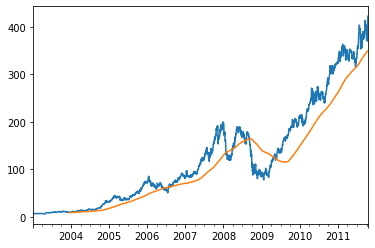

In [159]:
close_px.AAPL.plot()

# Explanation about rolling and expanding windows https://robotwealth.com/rolling-and-expanding-windows-for-dummies/
# “What’s the mean of the past n values at this point in time?” – Use rolling windows here.
# “What’s the mean of all the data available up to this point in time?” – Use expanding windows here.
close_px.AAPL.rolling(250).mean().plot()

In [160]:
print(len(close_px.AAPL))
print(len(close_px.AAPL.rolling(250).mean()))

2292
2292


In [161]:
close_px.AAPL[:5]

2003-01-02    7.40
2003-01-03    7.45
2003-01-06    7.45
2003-01-07    7.43
2003-01-08    7.28
Freq: B, Name: AAPL, dtype: float64

In [163]:
close_px.AAPL.rolling(250).mean()[:5]

2003-01-02   NaN
2003-01-03   NaN
2003-01-06   NaN
2003-01-07   NaN
2003-01-08   NaN
Freq: B, Name: AAPL, dtype: float64

In [164]:
len(close_px.AAPL.rolling(250).mean().dropna())

2043

In [165]:
2292 - 2043

249

In [166]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

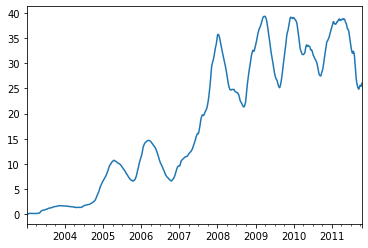

In [167]:
appl_std250.plot()

<AxesSubplot:>

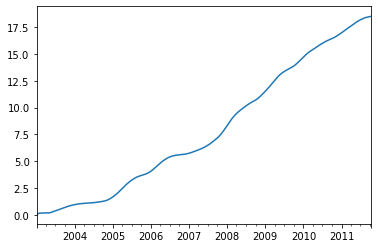

In [170]:
# What is 'expanding'?
expanding_mean = appl_std250.expanding().mean()
expanding_mean.plot()

<AxesSubplot:>

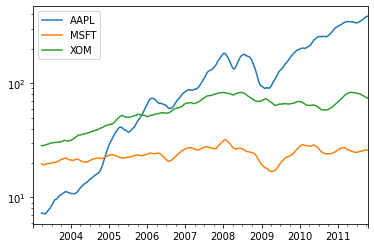

In [169]:
close_px.rolling(60).mean().plot(logy=True)

In [171]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions